
### Feature Hypothesis : 

#### What are the expected reletionships of independent variables with review score?
1. order_items_qty ("+") - if consumer gets more than one item from the same seller, it should mean that he/she knows the quality of the good. Therefore, increase in item quantity should increase review score
2. product_description_lenght ("+") - buyer having more information about buying product should have positive relationship with review score
3. product_photos_qty ("+")
4. product_name_lenght ('unknown')- shorter names sometimes can be ambiguous or can be easy to understand,so relationship with review score is unknown at this point
5. delivery_accuracy ("+") - item coming on time or earlier that it was described should have positive relationship with review score
6. order_products_value ("-") - more expensive perhaps means better quality or higher expectation towards order fulfilment;
7. order_freight_value ("-") - more frieght means more expectation towards delivery accuracy


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 
import seaborn as sns
import datetime as dt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
#import calendar as cal
#import workalendar
from workalendar.america import Brazil
from datetime import date
from sklearn.cross_validation import train_test_split
%store -r orders_v2

C:\Users\R2D2\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
orders = orders_v2[['order_status', 'order_products_value',
                 'order_freight_value', 'order_items_qty', 'order_sellers_qty',
                 'order_purchase_timestamp', 'order_aproved_at', 'order_estimated_delivery_date', 
                 'order_delivered_customer_date', 'customer_state', 
                 'product_category_name', 'product_name_lenght', 'product_description_lenght', 
                 'product_photos_qty', 'review_score']]

In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
order_status                     100000 non-null object
order_products_value             100000 non-null float64
order_freight_value              100000 non-null float64
order_items_qty                  100000 non-null int64
order_sellers_qty                100000 non-null int64
order_purchase_timestamp         100000 non-null datetime64[ns]
order_aproved_at                 99982 non-null datetime64[ns]
order_estimated_delivery_date    100000 non-null datetime64[ns]
order_delivered_customer_date    97595 non-null datetime64[ns]
customer_state                   100000 non-null object
product_category_name            100000 non-null object
product_name_lenght              100000 non-null int64
product_description_lenght       100000 non-null int64
product_photos_qty               100000 non-null int64
review_score                     100000 non-null int64
dtypes: datetime64[ns](4

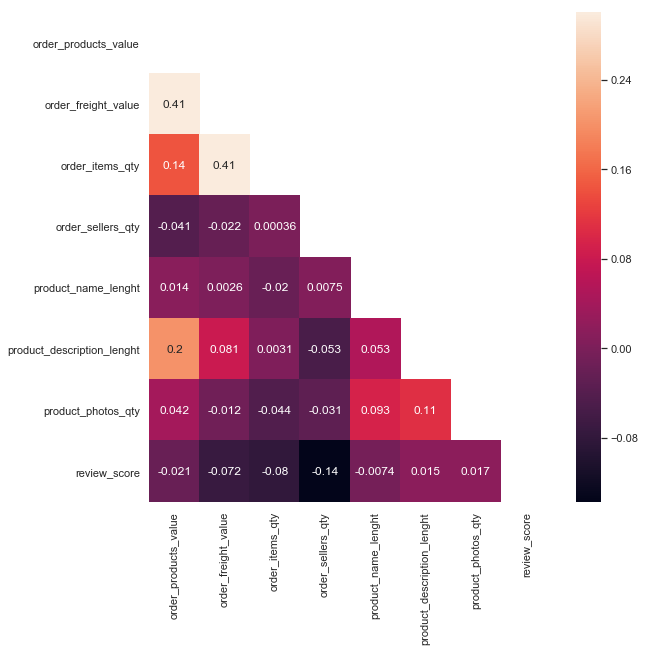

In [5]:
sns.set(font_scale=1)
corr = orders.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(9,9))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, annot=True)

Most variables do have quite weak relationship with review score.Lets try fitting this is OLS regression. 

Let’s interpret the table.Overall the model is significiant.

__Prob(F-statistcs)__= 0.000 This is the p-value associated with the F-statistic(F(6,97588)= 1197). It is used in testing the null hypothesis that all of the model coefficients are 0. 

This tells us that there is a significant difference in the group means. 

__Coef.__ : These are the values for the regression equation for predicting the dependent variable from the independent variable. The regression equation is presented in many different ways, for example:

Ypredicted = b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4

The column of estimates provides the values for b0, b1, b2, b3 and b4 for this equation. 

   __order_items_qty__:-0.2464	So for every unit increase in order item qianity, a 0.2464 unit decrease in review_score  is
                       predicted, holding all other variables constant. 

   __product_name_lenght__ :-0.0019	for every unit increase in product_name_lenght, a 0.0019 unit decrease in review_score 
                       is predicted, holding all other variables constant. 

   __product_description_lenght__ :4.038e-05 for every unit increase in product_description_lenght, a 4.038e-05 unit increase in
                       review_score  is predicted, holding all other variables constant.

   __product_photos_qty__ :	0.0106	for every unit increase in product_photos_qty, a 0.0106 unit increase in
                       review_score  is predicted, holding all other variables constant.
                       
   __order_delivery_before_estimated_date_in_days__: 0.0317	for every unit increase in order delivery accuracy, a 0.0317 unit 
                       increase in review_score  is predicted, holding all other variables constant.
               
   __order_products_value__ :-2.767e-05	for every unit increase in product_name_lenght, a 2.767e-05 unit decrease in 
                       review_score is predicted, holding all other variables constant. 


Looking at the __p-values__ :
__P>|t|__ – This column shows the 2-tailed p-values used in testing the null hypothesis that the coefficient (parameter) is 0.   Using an alpha of 0.05:

   The coefficient for all the variables is significantly different from 0 because their p-value is 0.000 or smaller than 0.05.This means here's no difference between the means and conclude that a significant difference does exist.
   

All of our independent variables are statistically significant which is a great news.But It's clear that we have to use more informative features to model this problem. 